# 1- Data Tidying:
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

<h3>
1. To load the dataset <br>
</h3>

In [1]:
import pandas as pd

data = pd.read_csv('tb-raw.csv')


<h3>
2. To expand the data vertically. <br>
    - fixing country and year columns data <br>
    - creating new columns - age_sex and its count. <br>
 <br>
</h3>

In [2]:

# Step 2: Reshape the data
data = data.melt(id_vars=['country', 'year'], var_name='age_sex', value_name='count')



<h3>
3. To extract the relevant data based on the pattern. <br>
    - Creating sex and age_group column <br>
    - extracting the pattern - <br>
        considering m/f to understand if its male or female. <br>
        considering 2 to 4 digit number to understand the age group.
         
 <br>
</h3>

In [3]:
# Step 3: Extract relevant information
data[['sex', 'age_group']] = data['age_sex'].str.extract(r'([mf])(\d{2,4})')



<h3>
4. This line fills missing values (NaN) in the 'count' column with zeros, ensuring that all count values are numeric.
         
 <br>
</h3>

In [4]:

data['count'] = data['count'].fillna(0)



<h3>
5. Reorganizing columns
         
 <br>
</h3>

In [5]:

tidy_data = data[['country', 'year', 'sex', 'age_group', 'count']]

<h3>
6. Converting data to csv file.
         
 <br>
</h3>

In [6]:
tidy_data.to_csv('tidied_dataset.csv', index=False)

## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


In [7]:
df = pd.read_csv('salesMinimized.csv')



<h3>
Dropping the columns that are empty <br>
Filling empty spaces with 0
</h3>

In [8]:
df.dropna(axis=1, how="all",inplace=True)
df.fillna(-1, inplace=True)
print(df.head())

   Unnamed: 0                             id        item_id    dept_id  \
0           0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1   
1           1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1   
2           2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1   
3           3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1   
4           4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1   

    cat_id store_id state_id  d_1  d_2  d_3  ...  d_61  d_62  d_63  d_64  \
0  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
1  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
2  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   
3  HOBBIES     CA_1       CA    0    0    0  ...     1     0     0     0   
4  HOBBIES     CA_1       CA    0    0    0  ...     0     0     0     0   

   d_65  d_66  d_67  d_68  d_69  d_70  
0     0     0     0     0     0     0  
1     0     0     

<h3>
Renaming the columns
</h3>


In [9]:
df.rename(columns={
    'id': 'Sales_ID',
    'item_id': 'Item_ID',
    'dept_id': 'Department_ID',
    'cat_id': 'Category_ID',
    'store_id': 'Store_ID',
    'state_id': 'State_ID',
    # Add more renames as necessary
}, inplace=True)

df.to_csv('tidy_salesMinimized.csv', index=False)



## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

In [10]:
# Importing
data_url = "http://lib.stat.cmu.edu/datasets/boston"

<h3> 
Converting boston dataset to organized CSV: <br>

- Reading data from the source <br>
- setting column names <br>
- flattning data to 1D array to fix NaN <br>
- Removing all null values and creating new final_values dataset
- Reshaping final dataset to 2D <br>
- converting it to CSV file. <br>
</h3>

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]


null_values = df.values.flatten()
final_values = null_values[~np.isnan(null_values)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = final_values.reshape(-1, len(columns)),
    columns = columns,
)

df.to_csv('boston.csv', index=False)




<h3>
Visualization technique
</h3>

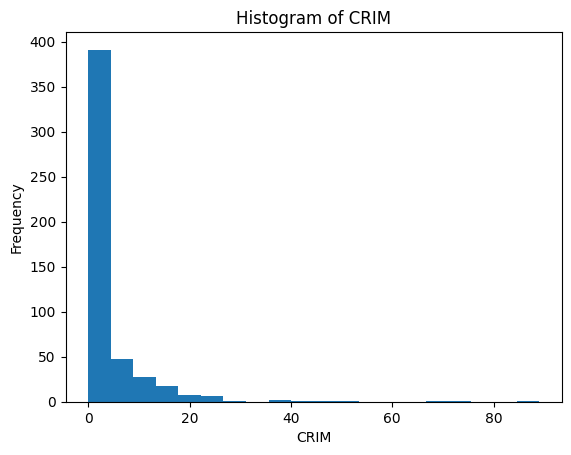

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['CRIM'], bins=20)
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.title('Histogram of CRIME Rate')
plt.show()

<h3>
Statistical Approach
</h3>

In [ ]:
import pandas as pd
import numpy as np



# Calculate basic statistics
basic_stats = df.describe()

# Calculate correlation coefficients
correlation_matrix = df.corr()


print("Basic Statistics:")
print(basic_stats)

print("\nCorrelation Coefficients:")
print(correlation_matrix)


Basic Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     2

<h3>
Outlier removing approach
</h3>


In [ ]:

from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(df)


# Find all data points with a z-score greater than 3 or less than -3
outliers = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

print("NUMBER OF OUTLIERS: - zscore approach  ",sum(outliers))

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Left whisker or Right whisker
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the number of outliers
print("NUMBER OF OUTLIERS: - whiskers approach  ",sum(outliers))



# Remove all rows with outliers
df = df[~outliers]

NUMBER OF OUTLIERS: - zscore approach   91
NUMBER OF OUTLIERS: - whiskers approach   238
